In [1]:
import numpy as np
from utils.LoadDataset import LoadDataset
from models.LinearRegression import LinearRegression
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
N = 10
alphas = np.arange(0, 4.1, 0.1)
alpha_to_losses = {}
alpha_to_average_loss = {}

for i in range(N):
# 10-fold cross validation
    X_train, y_train, X_val, y_val = LoadDataset(i, N)
    for alpha in alphas: 
        reg = LinearRegression(alpha)
        #reg = Ridge(alpha=alpha)
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_val)
        loss = np.linalg.norm(y_pred - y_val)**2
        alpha_to_losses.setdefault(alpha, []).append(loss)
        
for alpha in sorted(alpha_to_losses):
    sum_losses = 0
    for loss in alpha_to_losses[alpha]:
        sum_losses += loss
    average_loss = sum_losses / N
    alpha_to_average_loss.setdefault(alpha, []).append(average_loss)
    #print("alpha = %.2f, average loss = %.5f" % (alpha, average_loss))

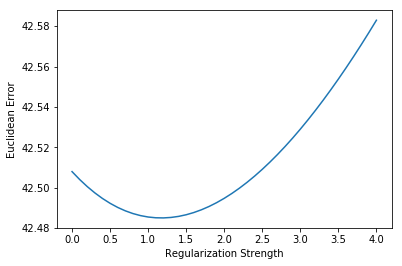

In [3]:
loss_values = [alpha_to_average_loss[alpha] for alpha in alphas]
plt.plot(alphas, loss_values)
plt.xlabel('Regularization Strength')
plt.ylabel('Euclidean Error')
plt.show()

In [4]:
best_index = np.argmin(np.array(loss_values))
best_alpha = alphas[best_index]
print("Best lambda is: %.1f" % best_alpha)

Best lambda is: 1.2
